In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!cp -av /content/drive/MyDrive/BED-EEG/Codes/* '/content/'

# Import Libraries
 

In [3]:
##loading library
%%capture
%cd /content/
%pylab inline
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np
import scipy.io
!gdown --id 1IMnZCFSg34wjtCVIEMqBiC5G6OoczeMX
!gdown --id 1fNKF5GgsQ1VVx0uejM9Eb26Y6b8lMvSn
!pip install imblearn
!pip install sklearn
!pip install missingpy
!pip install sweetviz
!pip install eeglib
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from library import*
from models import*
from anova_test import*
from classifications import*
from data_balancing import*
from data_processing import*
from data_segmentation import*
from feature_selection import*
from utils import*

In [4]:
#data path
file_dir='/content/drive/MyDrive/BED-EEG/RAW_PARSED'

## Data loading and segmentation

In [ ]:
# data_segmentation(file_dir)

## Data preprocessing (windowing, filtering, and feature extraction)

In [ ]:
## Segmented data loading
import pickle
feat_file=pickle.load(open(r'full_data1.pkl','rb'))

In [ ]:
# data_processing(feat_file,256)  #window size 128 

## Train test split

In [5]:
#Putting the data file 
data=pd.read_csv(r'Final_full_data1n.csv')
data['subject']=pd.DataFrame([x.split('_')[0] for x in data.sub_session])
data

,Unnamed: 0,F3_mean,F3_std,F3_ptp,F3_var,F3_minim,F3_maxim,F3_argminim,F3_argmaxim,F3_mean_square,...,F4_hjorthActivity,F4_hjorthMobility,F4_hjorthComplexity,F4_LZC,F4_sampEn,F4_DFA,F4_HFD,sub_session,Label,subject
0,0,110.047706,1556.109422,5750.962166,2.421477e+06,-1314.594694,4436.367472,114.0,3.0,2.433587e+06,...,2.421341e+06,0.149956,2.958156,0.21875,0.030910,1.761533,1.203479,s10_s1,IMAGE,s10
1,1,115.761131,1541.043376,5714.350587,2.374815e+06,-1296.093242,4418.257344,113.0,3.0,2.388215e+06,...,2.393367e+06,0.150147,2.955677,0.21875,0.030693,1.762306,1.204694,s10_s1,IMAGE,s10
2,2,109.694938,1562.577152,5778.057158,2.441647e+06,-1318.595034,4459.462124,111.0,3.0,2.453680e+06,...,2.437487e+06,0.149631,2.957985,0.21875,0.030950,1.763319,1.204140,s10_s1,IMAGE,s10
3,3,109.660141,1553.719580,5739.210149,2.414045e+06,-1293.671512,4445.538637,110.0,3.0,2.426070e+06,...,2.410097e+06,0.150095,2.950896,0.21875,0.030537,1.761171,1.202782,s10_s1,IMAGE,s10
4,4,113.146584,1540.217249,5706.639376,2.372269e+06,-1281.696205,4424.943171,113.0,3.0,2.385071e+06,...,2.394958e+06,0.150248,2.950548,0.21875,0.030990,1.763340,1.204245,s10_s1,IMAGE,s10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98846,98846,111.591469,1555.415139,5748.746869,2.419316e+06,-1301.004935,4447.741934,115.0,3.0,2.431769e+06,...,2.410596e+06,0.149806,2.956733,0.21875,0.031253,1.763956,1.203666,s9_s3,EYES_OPEN,s9
98847,98847,112.558224,1552.145588,5748.020444,2.409156e+06,-1299.522808,4448.497635,115.0,3.0,2.421825e+06,...,2.368952e+06,0.150956,2.935612,0.21875,0.030552,1.763276,1.208521,s9_s3,EYES_OPEN,s9
98848,98848,112.073377,1554.983209,5752.709043,2.417973e+06,-1302.942149,4449.766894,113.0,3.0,2.430533e+06,...,2.422607e+06,0.150410,2.944389,0.21875,0.031668,1.761461,1.205216,s9_s3,EYES_OPEN,s9
98849,98849,111.650989,1556.143030,5750.858201,2.421581e+06,-1298.768733,4452.089468,115.0,3.0,2.434047e+06,...,2.441518e+06,0.149992,2.953463,0.21875,0.029948,1.757377,1.205473,s9_s3,EYES_OPEN,s9


In [6]:
### select the events for final classification
# ['IMAGE', 'COGNITIVE', 'SSVEPC_5Hz', 'SSVEP_5Hz', 'REST','EYES_OPEN', 'SSVEPC_3Hz', 'SSVEPC_7Hz', 'SSVEPC_10Hz','SSVEP_3Hz', 'SSVEP_7Hz', 'SSVEP_10Hz', 'EYES_CLOSED'],
event=['REST','IMAGE']
df=data
df1 = df[df['Label'].isin(event)]
data=df1

In [7]:
#label encoding
lbl1=['IMAGE', 'COGNITIVE', 'SSVEPC_5Hz', 'SSVEP_5Hz', 'REST','EYES_OPEN', 'SSVEPC_3Hz', 'SSVEPC_7Hz', 'SSVEPC_10Hz','SSVEP_3Hz', 'SSVEP_7Hz', 'SSVEP_10Hz', 'EYES_CLOSED'] # stimulii
lbl11=['s1', 's2','s3','s4', 's5', 's6', 's7', 's8','s9','s10', 's11', 's12', 's13', 's14', 's15', 's16', 's17','s18', 's19', 's20', 's21' ] #subject
for i,j in enumerate(lbl1):
    data=data.replace(j, i)

for i,j in enumerate(lbl11):
    data=data.replace(j, int(j[1:]))

x_tr1=data.iloc[:,2:-3]
y_tr1=data['Label']
data['session']=pd.DataFrame([x.split('_')[1] for x in data.sub_session])


In [8]:
#the session for training and test
# train_session_1,train_session_2='s1','s2'   # session 1 & session 2 intaining
test_session='s3'
##############
data_s1_s2=data[data['session']!=test_session]
data_s3=data[data['session']==test_session]
# data_s3

In [9]:
### stimulii wise
x_tr=data_s1_s2.iloc[:,2:-4]
y_tr=data_s1_s2['Label']

x_ts=data_s3.iloc[:,2:-4]
y_ts=data_s3['Label']

In [ ]:
# ### subject wise 
# x_tr=data_s1_s2.iloc[:,1:-4]
# y_tr=data_s1_s2['subject']

# x_ts=data_s3.iloc[:,1:-4]
# y_ts=data_s3['subject']

**Data Profile Visualization**

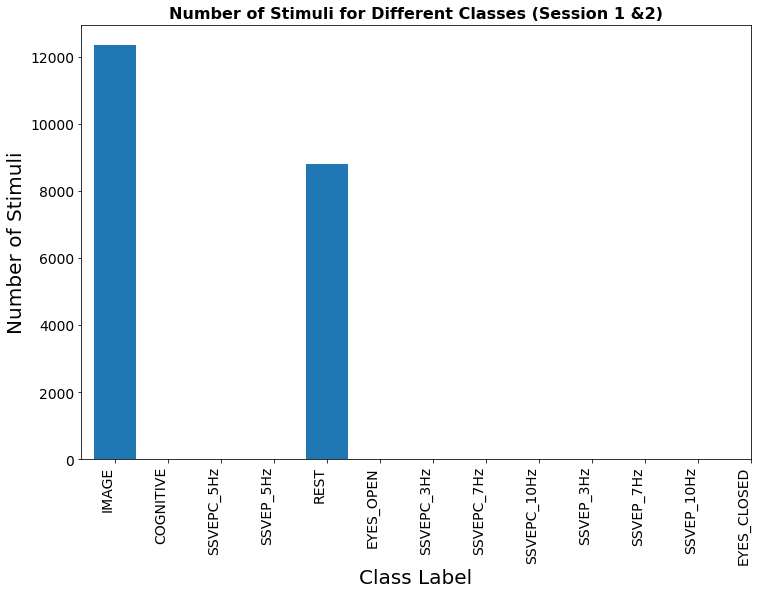

In [10]:

fig,ax=plt.subplots(figsize = (12,8))
# ax.figure(figsize = (12,8))
# creating the bar 
cal=list(data_s1_s2.Label.value_counts().index)
val=list(data_s1_s2.Label.value_counts().values)

ax.bar(cal,val)
ax.set_xlabel("Class Label", fontsize = 20)
ax.set_ylabel("Number of Stimuli", fontsize = 20)
ax.set_title("Number of Stimuli for Different Classes (Session 1 &2)",  fontweight="bold", size=16)
labels = lbl1
ax.set_xticks([0,1, 2, 3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(labels, rotation=90, ha='right')
ax.tick_params(axis='both', which='major', labelsize=14)


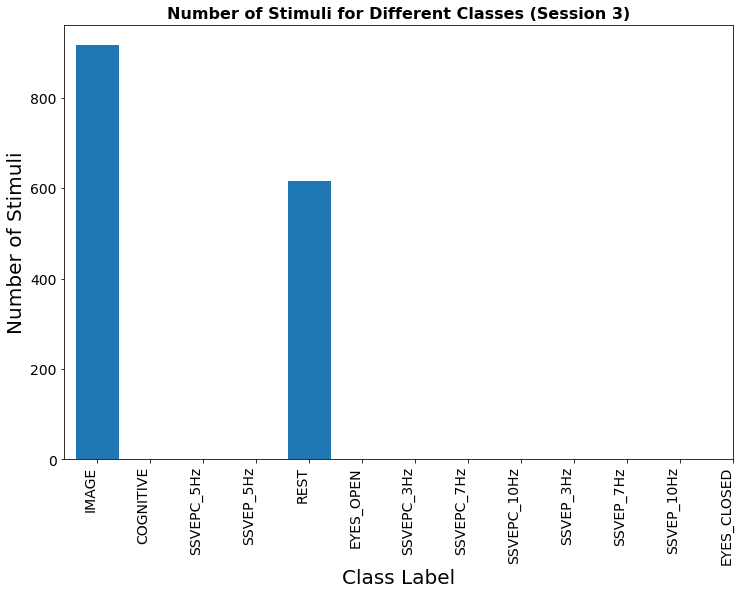

In [11]:

fig,ax=plt.subplots(figsize = (12,8))
# ax.figure(figsize = (12,8))
# creating the bar 
cal=list(data_s3.Label.value_counts().index)
val=list(data_s3.Label.value_counts().values)

ax.bar(cal,val)
ax.set_xlabel("Class Label", fontsize = 20)
ax.set_ylabel("Number of Stimuli", fontsize = 20)
ax.set_title("Number of Stimuli for Different Classes (Session 3)",  fontweight="bold", size=16)
labels = lbl1
ax.set_xticks([0,1, 2, 3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(labels, rotation=90, ha='right')
ax.tick_params(axis='both', which='major', labelsize=14)


## Feature selection

In [12]:
## Feature Correlation removing which are more than 85% correlated
%%capture
xx=x_tr1
cor_matrix = xx.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
df1 = xx.drop(to_drop, axis=1)
x=df1
y=y_tr1
x

Feature ranking:
1. feature no:57 feature name:P7_std (0.034928)
2. feature no:73 feature name:O1_maxim (0.032107)
3. feature no:80 feature name:O2_ptp (0.028344)
4. feature no:48 feature name:T7_std (0.023373)
5. feature no:72 feature name:O1_ptp (0.023241)
6. feature no:89 feature name:T8_mean (0.022544)
7. feature no:49 feature name:T7_maxim (0.020650)
8. feature no:1 feature name:F3_ptp (0.018921)
9. feature no:47 feature name:T7_mean (0.017953)
10. feature no:108 feature name:F8_kurtosis (0.016471)
11. feature no:0 feature name:F3_std (0.015687)
12. feature no:41 feature name:F7_skewness (0.014745)
13. feature no:35 feature name:F7_mean (0.014597)
14. feature no:127 feature name:F4_abs_diffs_signal (0.014322)
15. feature no:18 feature name:FC5_std (0.014207)
16. feature no:102 feature name:F8_mean (0.013759)
17. feature no:56 feature name:P7_mean (0.013456)
18. feature no:36 feature name:F7_std (0.012862)
19. feature no:65 feature name:P7_PFD(){}_0 (0.012642)
20. feature no:103 fe

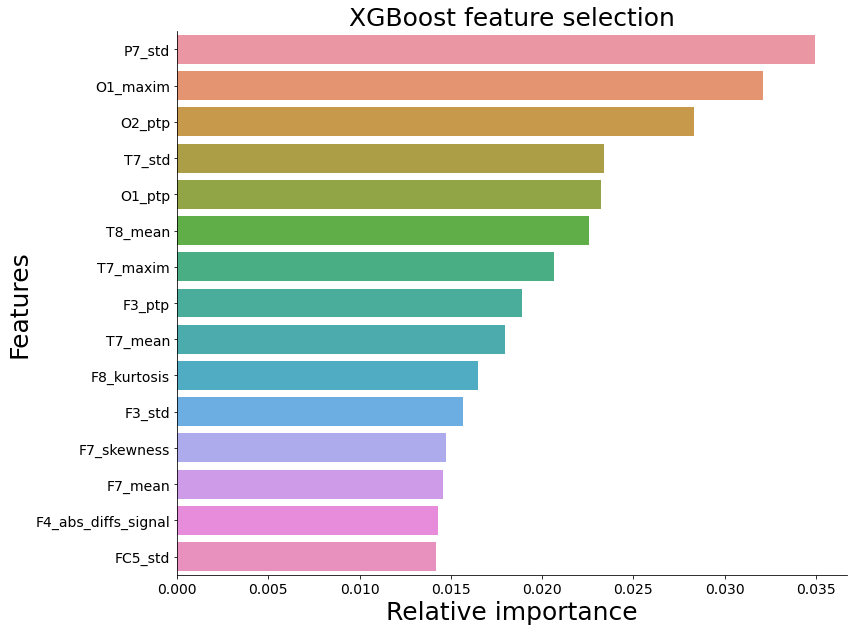

-----------------------------------------------------------------
Feature ranking:
1. feature no:49 feature name:T7_maxim (0.036842)
2. feature no:80 feature name:O2_ptp (0.036194)
3. feature no:57 feature name:P7_std (0.027333)
4. feature no:48 feature name:T7_std (0.026192)
5. feature no:73 feature name:O1_maxim (0.023883)
6. feature no:18 feature name:FC5_std (0.021953)
7. feature no:58 feature name:P7_ptp (0.021279)
8. feature no:72 feature name:O1_ptp (0.021036)
9. feature no:62 feature name:P7_abs_diffs_signal (0.020268)
10. feature no:0 feature name:F3_std (0.018763)
11. feature no:47 feature name:T7_mean (0.016939)
12. feature no:36 feature name:F7_std (0.014376)
13. feature no:59 feature name:P7_maxim (0.014355)
14. feature no:56 feature name:P7_mean (0.014028)
15. feature no:2 feature name:F3_maxim (0.013540)
16. feature no:124 feature name:F4_std (0.013277)
17. feature no:102 feature name:F8_mean (0.013197)
18. feature no:1 feature name:F3_ptp (0.013196)
19. feature no:127 f

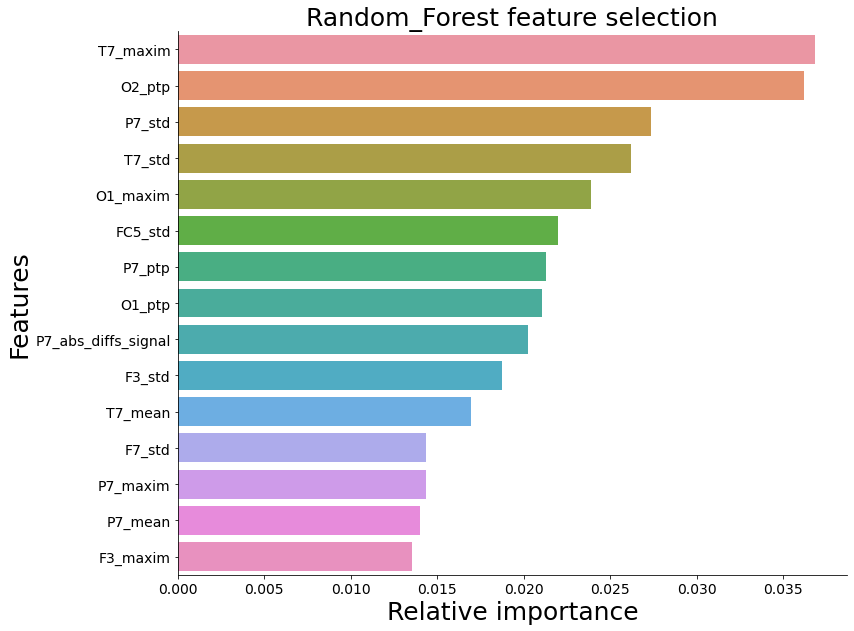

-----------------------------------------------------------------
Feature ranking:
1. feature no:52 feature name:T7_PFD(){}_0 (0.012775)
2. feature no:8 feature name:F3_PFD(){}_0 (0.012397)
3. feature no:57 feature name:P7_std (0.012242)
4. feature no:73 feature name:O1_maxim (0.011975)
5. feature no:65 feature name:P7_PFD(){}_0 (0.011537)
6. feature no:72 feature name:O1_ptp (0.011502)
7. feature no:59 feature name:P7_maxim (0.010717)
8. feature no:80 feature name:O2_ptp (0.010568)
9. feature no:58 feature name:P7_ptp (0.010453)
10. feature no:49 feature name:T7_maxim (0.009820)
11. feature no:82 feature name:O2_abs_diffs_signal (0.009807)
12. feature no:124 feature name:F4_std (0.009614)
13. feature no:18 feature name:FC5_std (0.009408)
14. feature no:48 feature name:T7_std (0.009307)
15. feature no:125 feature name:F4_maxim (0.009294)
16. feature no:62 feature name:P7_abs_diffs_signal (0.009189)
17. feature no:20 feature name:FC5_maxim (0.008972)
18. feature no:0 feature name:F3_std

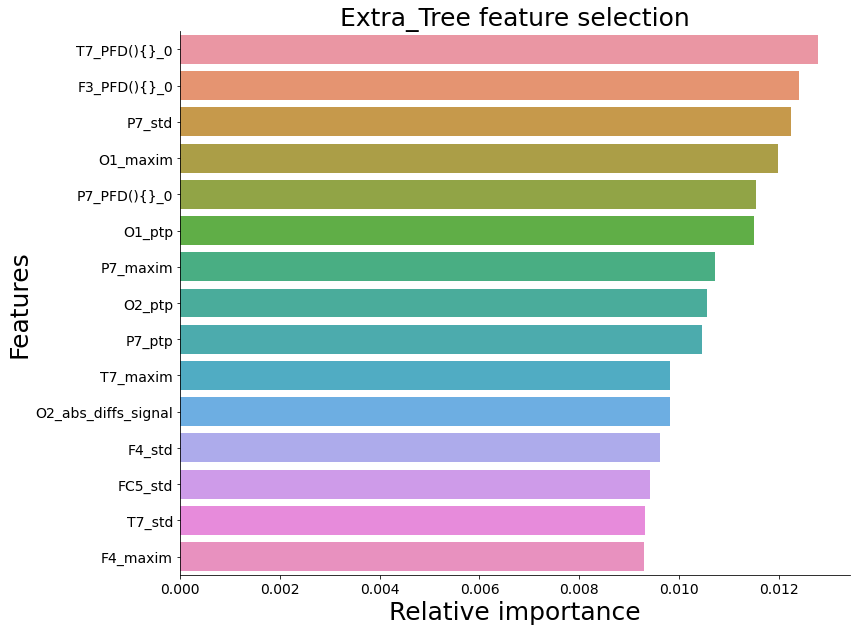

-----------------------------------------------------------------


In [13]:
#feature ranking using xgboost,randomforest,extratree
xgboost,randomforest,extratree=feature_selection(x,y)

### Classification

In [14]:
#Data balancing for training
d=data_balancing(x_tr1, x_ts,y_tr1,y_ts)

In [15]:
###Please edit this part
data=d
ind=x_tr.columns #feature names
feature_num=40
feat_increment=5
feature_selection_model=randomforest   ##choose any of them [xgboost,randomforest,extratree]
classifier=3##choose 0= MLP, 1= LDA, 2 = XGBoost, 3 = RF, 4= Logit, 5=SVC, 6 = Extra tree, 7= Adaboost, 8 = KNN, 9 = GradientBoost

In [16]:
%%capture
Result,target,prediction=classification(data,classifier,feature_selection_model,feature_num,feat_increment,ind)

In [17]:
Result

,Accuracy,Precision,Recall,Specificity,F1-score
0,61.20,61.20,64.31,61.20,61.50
1,70.87,70.87,75.66,70.87,70.97
2,73.48,73.48,78.94,73.48,73.52
3,74.13,74.13,79.92,74.13,74.15
4,74.07,74.07,79.67,74.07,74.10
5,76.03,76.03,81.02,76.03,76.12
6,76.03,76.03,81.35,76.03,76.09
7,76.75,76.75,81.55,76.75,76.85


# PCA

### Feature dimensionality reduction using PCA

In [18]:
trainx,testx=pca_(x_tr1,x_ts,n_components=20)

In [19]:
#data balancing
d1=data_balancing(trainx, testx,y_tr1,y_ts)

### Classification with PCA

In [20]:
###Please edit this part
data=d1
ind=x_tr.columns
classifier=3##choose 0= MLP, 1= LDA, 2 = XGBoost, 3 = RF, 4= Logit, 5=SVC, 6 = Extra tree, 7= Adaboost, 8 = KNN, 9 = GradientBoost

In [21]:
%%capture
Result1,target1,prediction1=classification_pca(data,classifier,ind)

In [22]:
Result1

,Accuracy,Precision,Recall,Specificity,F1-score
0,75.96,75.96,78.6,75.96,76.19


### Subjectwise result

In [23]:
import pandas as pd
y2=target
y_pred=prediction
sub=data_s3[['sub_session']].reset_index()
y11=pd.DataFrame(y2,columns=['label'])
y1p=pd.DataFrame(y_pred,columns=['pred'])
res=pd.concat([sub,y11,y1p],1)


out=[]
# sub_out=[]
for i in range(len(res)):
  lb=res.label[i]
  pr=res.pred[i]
  # sub_out.append(int('1'))
  if lb==pr:
    out.append(int('1'))
  else:
    out.append(int('0'))

out11=pd.DataFrame(out,columns=['accuracy'])
# sub_out11=pd.DataFrame(sub_out,columns=['sub_out'])
res112=pd.concat([res,out11],1)

lbl1=['IMAGE', 'COGNITIVE', 'SSVEPC_5Hz', 'SSVEP_5Hz', 'REST','EYES_OPEN', 'SSVEPC_3Hz', 'SSVEPC_7Hz', 'SSVEPC_10Hz','SSVEP_3Hz', 'SSVEP_7Hz', 'SSVEP_10Hz', 'EYES_CLOSED']

for i,j in enumerate(lbl1):
  res112['label']=res112['label'].replace([i],j)

resn=res112[['sub_session','label','accuracy']]
resn=resn.groupby(['sub_session','label']).mean()
resn['accuracy']=resn.accuracy*100

In [24]:
resn

accuracy
sub_session label            
s10_s1      REST    90.131579
s10_s3      IMAGE   84.236453
            REST    94.827586
s11_s2      IMAGE   61.320755
            REST    94.078947
s12_s1      IMAGE  100.000000
            REST    90.131579
s12_s3      IMAGE   54.629630
s13_s2      IMAGE   82.352941
s14_s1      IMAGE   35.779817
s14_s2      REST    95.049505
s14_s3      IMAGE  100.000000

In [25]:
resn.to_csv('subjectwise_result.csv')

## Analysis of Variance Test (ANOVA)

Here i have selected ANOVA testing beacuse we have more than two (12)categories. T-test, Z-test will not work here becuase they only follow two group/cagtegories. Similarly, Chi-Square will not work because it can only calculate in categorical value (String value= "Name", "Gender" etc.)
I have selected 25 features using random forest feature selection method for the final classification, and For approximate 80% features (19 out 0f 25 feautres) I found the p-value is < 0.05 using ANOVA test.
In ANOVA report if the P-values is <0.05 which means it rejects the same mean data which also called (Null hypothesis).
If the F-Stattistic score >  3.0 that means the groups are in different distribution. Therefore it is easy to classify the categories (stimuli).



In [26]:
#Putting the data file 
data=pd.read_csv(r'/content/Final_full_data1n.csv')
feature_selection=extratree

In [27]:
anova_test(data,feature_selection)

                     stat score  p-values distribution
T7_PFD(){}_0          20.625290  0.000000    different
F3_PFD(){}_0          15.363225  0.000000    different
P7_std                11.945521  0.000000    different
O1_maxim               7.406043  0.000000    different
P7_PFD(){}_0           7.101440  0.000000    different
O1_ptp                 3.722080  0.000012    different
P7_maxim              13.151106  0.000000    different
O2_ptp                 5.023276  0.000000    different
P7_ptp                 8.863142  0.000000    different
T7_maxim               4.219727  0.000001    different
O2_abs_diffs_signal    6.232703  0.000000    different
F4_std                 6.044764  0.000000    different
FC5_std                3.557960  0.000025    different
T7_std                 1.875703  0.032215    different
F4_maxim               6.061736  0.000000    different
P7_abs_diffs_signal    8.569428  0.000000    different
FC5_maxim              7.303681  0.000000    different
F3_std    